<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%8B%89%E5%BC%B7object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://axa.biopapyrus.jp/media/tulip.jpg

--2021-06-26 15:24:23--  https://axa.biopapyrus.jp/media/tulip.jpg
Resolving axa.biopapyrus.jp (axa.biopapyrus.jp)... 160.16.232.219
Connecting to axa.biopapyrus.jp (axa.biopapyrus.jp)|160.16.232.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278541 (272K) [image/jpeg]
Saving to: ‘tulip.jpg’

tulip.jpg           100%[===================>] 272.01K   618KB/s    in 0.4s    

2021-06-26 15:24:24 (618 KB/s) - ‘tulip.jpg’ saved [278541/278541]



12
(40, 750, 1000, 3)


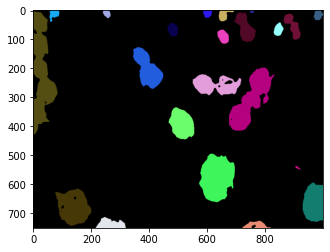

In [100]:
#https://axa.biopapyrus.jp/ia/opencv/object-detection.html

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# load image, change color spaces, and smoothing
img_tulip = cv2.imread('tulip.jpg')
img=img_tulip.copy()
print(img[0,0,0])
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

# detect tulips
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, img_flowers = cv2.threshold(img_H, 140, 255, cv2.THRESH_BINARY)
cv2.imwrite('tulips_mask.jpg', img_flowers)

# find tulips
nlabels, labels = cv2.connectedComponents(img_flowers)


img = np.zeros(img.shape[0:3])
height, width = img.shape[0:2]
cols = []

# background is label=0, objects are started from 1
for i in range(1, nlabels):
    cols.append(np.array([random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]))
segmentation_images=np.zeros([nlabels,750, 1000, 3])
print(segmentation_images.shape)
j=0
for i in range(1, nlabels):
    if np.std( cv2.Laplacian(img_tulip[labels == i, ] ,cv2.CV_64F).flatten() ) > 145:
      
      # print(np.std( img_tulip[labels == i, ]),img_tulip[labels == i, ].shape)
      # print(i)
      segmentation_images[j,labels == i, ] = img_tulip[labels == i, ]
      # print(i,segmentation_images[i].shape,np.unique(img_tulip[labels == i, ]))
      img[labels == i, ] = cols[i - 1]
      j=j+1
img=img.astype(np.uint8)
segmentation_images=segmentation_images.astype(np.uint8)
plt.imshow(img)

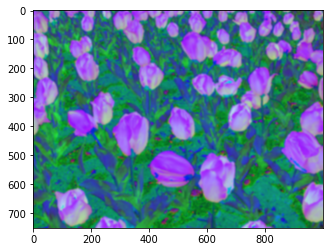

In [42]:
plt.imshow(img_HSV[:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


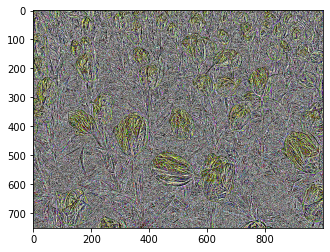

In [101]:
plt.imshow(cv2.Laplacian(img_tulip[:,:,:],cv2.CV_64F))




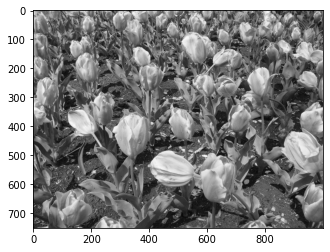

In [41]:
plt.imshow(cv2.cvtColor(img_tulip[:,:,:], cv2.COLOR_BGR2GRAY),cmap="gray")

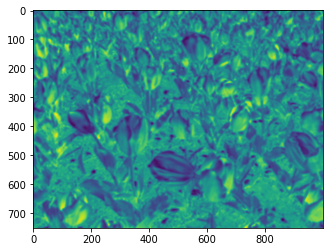

In [43]:
plt.imshow(img_HSV[:,:,1])

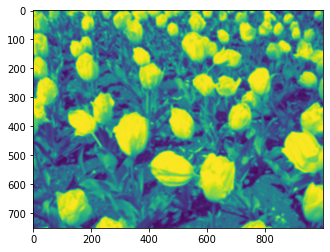

In [25]:
plt.imshow(img_HSV[:,:,2])

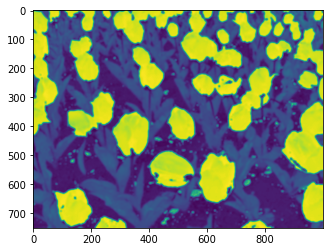

In [68]:
plt.imshow(img_HSV[:,:,0])

In [87]:
cv2.Laplacian(segmentation_images[3],cv2.CV_64F).flatten()
# plt.imshow(segmentation_images[3])

array([0., 0., 0., ..., 0., 0., 0.])